# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [10]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [14]:
def agentPlay(random = True, step = 200):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    for i in range(step):
        if random == True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        else:
            actions = agent.act(states, add_noise = False)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [15]:
agentPlay()

Total score (averaged over agents) this episode: 0.012499999720603228


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Agent 0:43
model 0:15
model 0:15


C:\Python36\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
F:\ml\reinforcement\DRLND\rep\p2_continuous-control\ddpg_agent.py:122: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


 Epsilon 1.00	Episode 1	Average Score: 1.11 Time Taken: 14.54 Total Time Taken: 14.54
 Epsilon 1.00	Episode 2	Average Score: 0.91 Time Taken: 14.27 Total Time Taken: 28.81
 Epsilon 1.00	Episode 3	Average Score: 0.71 Time Taken: 15.10 Total Time Taken: 43.91
 Epsilon 1.00	Episode 4	Average Score: 0.66 Time Taken: 14.40 Total Time Taken: 58.30
 Epsilon 1.00	Episode 5	Average Score: 0.62 Time Taken: 14.46 Total Time Taken: 72.76
 Epsilon 1.00	Episode 6	Average Score: 0.58 Time Taken: 14.45 Total Time Taken: 87.21
 Epsilon 1.00	Episode 7	Average Score: 0.54 Time Taken: 14.44 Total Time Taken: 101.65
 Epsilon 1.00	Episode 8	Average Score: 0.56 Time Taken: 16.22 Total Time Taken: 117.87
 Epsilon 1.00	Episode 9	Average Score: 0.57 Time Taken: 15.20 Total Time Taken: 133.07
 Epsilon 0.99	Episode 10	Average Score: 0.59 Time Taken: 14.53 Total Time Taken: 147.59
 Epsilon 0.99	Episode 11	Average Score: 0.63 Time Taken: 14.89 Total Time Taken: 162.48
 Epsilon 0.99	Episode 12	Average Score: 0.63 Ti

 Epsilon 0.95	Episode 94	Average Score: 2.51 Time Taken: 17.28 Total Time Taken: 1563.28
 Epsilon 0.95	Episode 95	Average Score: 2.54 Time Taken: 17.20 Total Time Taken: 1580.48
 Epsilon 0.95	Episode 96	Average Score: 2.57 Time Taken: 17.25 Total Time Taken: 1597.72
 Epsilon 0.95	Episode 97	Average Score: 2.61 Time Taken: 17.23 Total Time Taken: 1614.95
 Epsilon 0.95	Episode 98	Average Score: 2.63 Time Taken: 17.72 Total Time Taken: 1632.67
 Epsilon 0.95	Episode 99	Average Score: 2.66 Time Taken: 18.14 Total Time Taken: 1650.81
 Epsilon 0.95	Episode 100	Average Score: 2.69 Time Taken: 17.92 Total Time Taken: 1668.73
 Epsilon 0.95	Episode 101	Average Score: 2.74 Time Taken: 17.24 Total Time Taken: 1685.97
 Epsilon 0.95	Episode 102	Average Score: 2.79 Time Taken: 18.57 Total Time Taken: 1704.54
 Epsilon 0.95	Episode 103	Average Score: 2.85 Time Taken: 18.68 Total Time Taken: 1723.22
 Epsilon 0.95	Episode 104	Average Score: 2.89 Time Taken: 17.86 Total Time Taken: 1741.09
 Epsilon 0.95	Ep

 Epsilon 0.91	Episode 186	Average Score: 6.23 Time Taken: 17.33 Total Time Taken: 3170.72
 Epsilon 0.91	Episode 187	Average Score: 6.26 Time Taken: 17.18 Total Time Taken: 3187.90
 Epsilon 0.91	Episode 188	Average Score: 6.27 Time Taken: 17.30 Total Time Taken: 3205.20
 Epsilon 0.91	Episode 189	Average Score: 6.28 Time Taken: 17.22 Total Time Taken: 3222.42
 Epsilon 0.90	Episode 190	Average Score: 6.31 Time Taken: 17.25 Total Time Taken: 3239.67
 Epsilon 0.90	Episode 191	Average Score: 6.32 Time Taken: 17.38 Total Time Taken: 3257.05
 Epsilon 0.90	Episode 192	Average Score: 6.35 Time Taken: 17.07 Total Time Taken: 3274.13
 Epsilon 0.90	Episode 193	Average Score: 6.36 Time Taken: 17.36 Total Time Taken: 3291.49
 Epsilon 0.90	Episode 194	Average Score: 6.38 Time Taken: 17.09 Total Time Taken: 3308.57
 Epsilon 0.90	Episode 195	Average Score: 6.41 Time Taken: 17.55 Total Time Taken: 3326.12
 Epsilon 0.90	Episode 196	Average Score: 6.43 Time Taken: 17.59 Total Time Taken: 3343.71
 Epsilon 0

 Epsilon 0.86	Episode 278	Average Score: 7.74 Time Taken: 17.45 Total Time Taken: 4769.93
 Epsilon 0.86	Episode 279	Average Score: 7.79 Time Taken: 17.34 Total Time Taken: 4787.28
 Epsilon 0.86	Episode 280	Average Score: 7.86 Time Taken: 17.55 Total Time Taken: 4804.83
 Epsilon 0.86	Episode 281	Average Score: 7.91 Time Taken: 17.26 Total Time Taken: 4822.09
 Epsilon 0.86	Episode 282	Average Score: 7.97 Time Taken: 17.26 Total Time Taken: 4839.34
 Epsilon 0.86	Episode 283	Average Score: 8.01 Time Taken: 17.27 Total Time Taken: 4856.62
 Epsilon 0.86	Episode 284	Average Score: 8.06 Time Taken: 17.43 Total Time Taken: 4874.05
 Epsilon 0.86	Episode 285	Average Score: 8.10 Time Taken: 17.29 Total Time Taken: 4891.33
 Epsilon 0.86	Episode 286	Average Score: 8.14 Time Taken: 18.15 Total Time Taken: 4909.48
 Epsilon 0.86	Episode 287	Average Score: 8.17 Time Taken: 18.51 Total Time Taken: 4928.00
 Epsilon 0.86	Episode 288	Average Score: 8.24 Time Taken: 17.48 Total Time Taken: 4945.48
 Epsilon 0

 Epsilon 0.82	Episode 369	Average Score: 12.82 Time Taken: 17.38 Total Time Taken: 6394.16
 Epsilon 0.81	Episode 370	Average Score: 12.87 Time Taken: 17.40 Total Time Taken: 6411.56
 Epsilon 0.81	Episode 371	Average Score: 12.91 Time Taken: 17.36 Total Time Taken: 6428.92
 Epsilon 0.81	Episode 372	Average Score: 12.96 Time Taken: 17.32 Total Time Taken: 6446.24
 Epsilon 0.81	Episode 373	Average Score: 12.98 Time Taken: 17.39 Total Time Taken: 6463.62
 Epsilon 0.81	Episode 374	Average Score: 13.02 Time Taken: 17.38 Total Time Taken: 6481.01
 Epsilon 0.81	Episode 375	Average Score: 13.10 Time Taken: 17.40 Total Time Taken: 6498.41
 Epsilon 0.81	Episode 376	Average Score: 13.14 Time Taken: 17.46 Total Time Taken: 6515.87
 Epsilon 0.81	Episode 377	Average Score: 13.20 Time Taken: 17.36 Total Time Taken: 6533.23
 Epsilon 0.81	Episode 378	Average Score: 13.26 Time Taken: 17.57 Total Time Taken: 6550.80
 Epsilon 0.81	Episode 379	Average Score: 13.31 Time Taken: 17.37 Total Time Taken: 6568.17

 Epsilon 0.77	Episode 460	Average Score: 17.20 Time Taken: 17.63 Total Time Taken: 7983.42
 Epsilon 0.77	Episode 461	Average Score: 17.25 Time Taken: 17.25 Total Time Taken: 8000.67
 Epsilon 0.77	Episode 462	Average Score: 17.36 Time Taken: 17.26 Total Time Taken: 8017.93
 Epsilon 0.77	Episode 463	Average Score: 17.42 Time Taken: 17.39 Total Time Taken: 8035.33
 Epsilon 0.77	Episode 464	Average Score: 17.51 Time Taken: 17.44 Total Time Taken: 8052.77
 Epsilon 0.77	Episode 465	Average Score: 17.61 Time Taken: 17.43 Total Time Taken: 8070.19
 Epsilon 0.77	Episode 466	Average Score: 17.68 Time Taken: 17.45 Total Time Taken: 8087.64
 Epsilon 0.77	Episode 467	Average Score: 17.76 Time Taken: 17.28 Total Time Taken: 8104.92
 Epsilon 0.77	Episode 468	Average Score: 17.81 Time Taken: 17.34 Total Time Taken: 8122.26
 Epsilon 0.77	Episode 469	Average Score: 17.89 Time Taken: 17.30 Total Time Taken: 8139.56
 Epsilon 0.76	Episode 470	Average Score: 17.97 Time Taken: 17.31 Total Time Taken: 8156.87

 Epsilon 0.72	Episode 551	Average Score: 23.94 Time Taken: 17.21 Total Time Taken: 9568.04
 Epsilon 0.72	Episode 552	Average Score: 23.97 Time Taken: 17.57 Total Time Taken: 9585.61
 Epsilon 0.72	Episode 553	Average Score: 24.01 Time Taken: 17.52 Total Time Taken: 9603.13
 Epsilon 0.72	Episode 554	Average Score: 24.05 Time Taken: 17.55 Total Time Taken: 9620.67
 Epsilon 0.72	Episode 555	Average Score: 24.09 Time Taken: 17.42 Total Time Taken: 9638.10
 Epsilon 0.72	Episode 556	Average Score: 24.14 Time Taken: 17.48 Total Time Taken: 9655.58
 Epsilon 0.72	Episode 557	Average Score: 24.21 Time Taken: 17.32 Total Time Taken: 9672.89
 Epsilon 0.72	Episode 558	Average Score: 24.28 Time Taken: 17.34 Total Time Taken: 9690.23
 Epsilon 0.72	Episode 559	Average Score: 24.32 Time Taken: 18.17 Total Time Taken: 9708.40
 Epsilon 0.72	Episode 560	Average Score: 24.36 Time Taken: 19.03 Total Time Taken: 9727.43
 Epsilon 0.72	Episode 561	Average Score: 24.41 Time Taken: 17.50 Total Time Taken: 9744.93

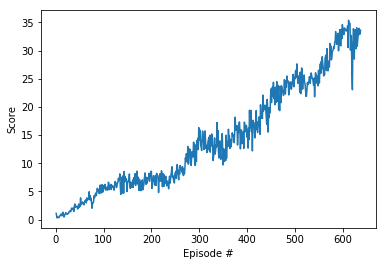

In [7]:
from collections import deque
import matplotlib.pyplot as plt
from itertools import count
import time
agent = Agent(state_size=state_size, action_size=action_size, random_seed=15)

def ddpg(n_episodes=1500, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_global=[]
    max_score = -np.Inf
    totalTimeTaken=0
    
    for i_episode in range(1, n_episodes+1):  
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations # get the current state (for each agent)
        
        scoresList = []
        agent.reset()
        score_average=0
        sTime = time.time()
        #for t in range(max_t):
        for t in count():
            actions = agent.act(states) ## agent acts
            
            env_info= env.step(actions)[brain_name] ## env goes to next stage
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scoresList += rewards
            
            if np.any(dones):
                break 

        sumTemp=np.sum(scoresList,axis=0)
        scoreTemp=sumTemp/float(num_agents)
        scores_deque.append(scoreTemp)
        score_average = np.mean(scores_deque)
        scores_global.append(scoreTemp)
        
        tTaken = time.time() - sTime
        totalTimeTaken+=tTaken
        
        #print('\rEpsilon {}\tEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(eps,i_episode, np.mean(scores_deque), score_average), end="")
        if i_episode % 1 == 0:
            print('\r Epsilon {:.2f}\tEpisode {}\tAverage Score: {:.2f} Time Taken: {:.2f} Total Time Taken: {:.2f}'.format(agent.eps,i_episode, np.mean(scores_deque), tTaken, totalTimeTaken))
        if score_average >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, score_average))  
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores_global

scoreAgent = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scoreAgent)+1), scoreAgent)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Watch a smart agent

In [16]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=15)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agentPlay(random = False, step = 1000)

Agent 0:43
model 0:15
model 0:15


C:\Python36\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode: 33.27549925623462


In [17]:
env.close()